In [8]:
from __future__ import division
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# import geopandas as gpd

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style("darkgrid")

# import os
# for dirname, _, filenames in os.walk('AB_NYC_2019.csv''):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [9]:
!pip install geopandas

In [10]:
import geopandas as gpd

In [11]:
data = pd.read_csv('AB_NYC_2019.csv')
data.shape

(48895, 16)

In [12]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [13]:
print('Number of features: %s' %data.shape[1])
print('Number of examples: %s' %data.shape[0])

Number of features: 16
Number of examples: 48895


In [14]:
# Describe only columns which contain numerical values
data.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
# Printing unique values for string columns

for col in data[['neighbourhood_group', 'neighbourhood', 'room_type']]:
    print('Unique values in column: %s' %col)
    print(data[col].unique()), '\n'

Unique values in column: neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values in column: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason 

In [17]:
print('Null values in airbnb dataset: \n')
print(data.isnull().sum())
print('\n')
print('Percentage of null values in review columns: ')
print(round(data['last_review'].isnull().sum()/len(df)*100, 2),'%')

Null values in airbnb dataset: 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Percentage of null values in review columns: 


NameError: name 'df' is not defined

<Axes: title={'center': 'Null values in last_review and review per month'}>

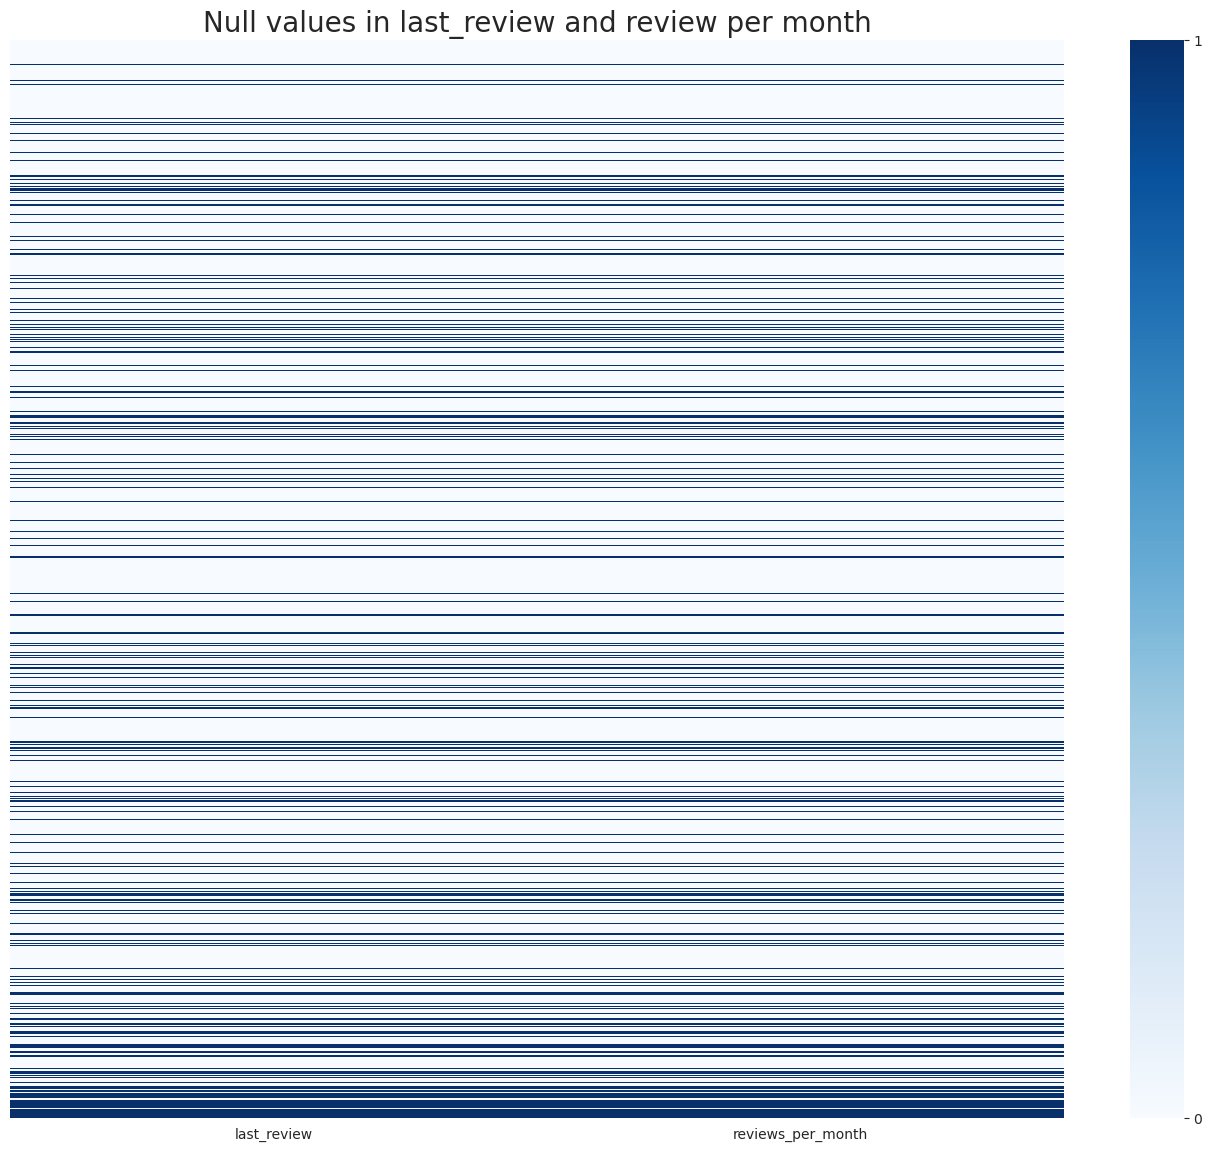

In [19]:
fig, ax = plt.subplots(figsize = (17,14))
plt.title('Null values in last_review and review per month', fontsize =20)
sns.heatmap(data[['last_review','reviews_per_month']].isnull(), cmap='Blues', yticklabels=False, ax = ax, cbar_kws={'ticks':[0,1]})

In [20]:
null_name = (pd.DataFrame(np.where((data['name'].isnull())))).transpose()
null_host_name = (pd.DataFrame(np.where((data['host_name'].isnull())))).transpose()

sum_null = pd.concat([null_name,null_host_name], axis=1, ignore_index = True)
sum_null.columns = ['Null rows in Name','Null rows in Host_name']
sum_null

,Null rows in Name,Null rows in Host_name
0,2854.0,360
1,3703.0,2700
2,5775.0,5745
3,5975.0,6075
4,6269.0,6582
5,6567.0,8163
6,6605.0,8257
7,8841.0,8852
8,11963.0,9138
9,12824.0,9817


In [21]:
data.drop('last_review', axis=1, inplace = True)

In [22]:
data['name'].fillna(value=0, inplace=True)

In [23]:
data['host_name'].fillna(value=0, inplace=True)

In [24]:
data['reviews_per_month'].fillna(value=0, inplace=True)

In [25]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [27]:
top_3_hosts = (pd.DataFrame(data.host_id.value_counts())).head(3)
top_3_hosts.columns=['Listings']
top_3_hosts['host_id'] = top_3_hosts.index
top_3_hosts.reset_index(drop=True, inplace=True)
top_3_hosts

,Listings,host_id
0,327,219517861
1,232,107434423
2,121,30283594


In [28]:
top_3_neigh = pd.DataFrame(data['neighbourhood_group'].value_counts().head(3))
top_3_neigh.columns=['Listings']
top_3_neigh['Neighbourhood Group'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
top_3_neigh

,Listings,Neighbourhood Group
0,21661,Manhattan
1,20104,Brooklyn
2,5666,Queens


In [29]:
average_price_ava = pd.DataFrame(data[['price', 'availability_365']].describe())
average_price_ava.columns = ['Price', 'Availability in a year']
average_price_ava

,Price,Availability in a year
count,48895.000000,48895.000000
mean,152.720687,112.781327
std,240.154170,131.622289
min,0.000000,0.000000
25%,69.000000,0.000000
50%,106.000000,45.000000
75%,175.000000,227.000000
max,10000.000000,365.000000


In [30]:
# Evaluation 4 - most reviewed hosts
data.reset_index(inplace=True)

# Group by 'number_of_reviews' and sum 'host_id'
rev_group = pd.DataFrame(data.groupby('number_of_reviews')['host_id'].sum())

# Sort by 'number_of_reviews' and get the top 3 most reviewed hosts
most_reviewed = rev_group.sort_values('number_of_reviews', ascending=False).head(3)

# Reset index and rename columns
most_reviewed.reset_index(inplace=True)
most_reviewed.columns = ['Number of reviews', 'Host ID']

most_reviewed


,Number of reviews,Host ID
0,629,47621202
1,607,4734398
2,597,4734398


In [31]:
# Evaluation 5 - the most reviewed hosts per month
data.reset_index(drop=True, inplace=True)

# Convert 'reviews_per_month' to numeric data type if needed
data['reviews_per_month'] = pd.to_numeric(data['reviews_per_month'], errors='coerce')

# Group by 'reviews_per_month' and sum 'host_id'
gr = pd.DataFrame(data.groupby('reviews_per_month')['host_id'].sum())

# Sort by 'reviews_per_month' and get the top 3 most reviewed hosts
rev = gr.sort_values('reviews_per_month', ascending=False).head(3)

# Reset index and rename columns
rev.reset_index(inplace=True)
rev.columns = ['Reviews per month', 'Host ID']

rev


,Reviews per month,Host ID
0,58.50,244361589
1,27.95,244361589
2,20.94,228415932


In [32]:

# Evaluation 6 - prices in every neighbourhood group

# Brooklyn
nei1 = data.loc[data['neighbourhood_group'] == 'Brooklyn']
price_nei1 = nei1[['price']]
# Manhattan
nei2 = data.loc[data['neighbourhood_group'] == 'Manhattan']
price_nei2 = nei2[['price']]
# Queens
nei3 = data.loc[data['neighbourhood_group'] == 'Queens']
price_nei3 = nei3[['price']]
# Staten Island
nei4 = data.loc[data['neighbourhood_group'] == 'Staten Island']
price_nei4 = nei4[['price']]
# Bronx
nei5 = data.loc[data['neighbourhood_group'] == 'Bronx']
price_nei5 = nei5[['price']]

price_list = [price_nei1, price_nei2, price_nei3, price_nei4, price_nei5]



price_stats = []
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# price statistics for every neighbourhood

for x in price_list:
    i = x.describe(percentiles=[.25, .5, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    price_stats.append(i)

price_stats[0].rename(columns={'price': nei_list[0]}, inplace=True)
price_stats[1].rename(columns={'price': nei_list[1]}, inplace=True)
price_stats[2].rename(columns={'price': nei_list[2]}, inplace=True)
price_stats[3].rename(columns={'price': nei_list[3]}, inplace=True)
price_stats[4].rename(columns={'price': nei_list[4]}, inplace=True)

# final view of dataframe

stats_df = price_stats
stats_df = [df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


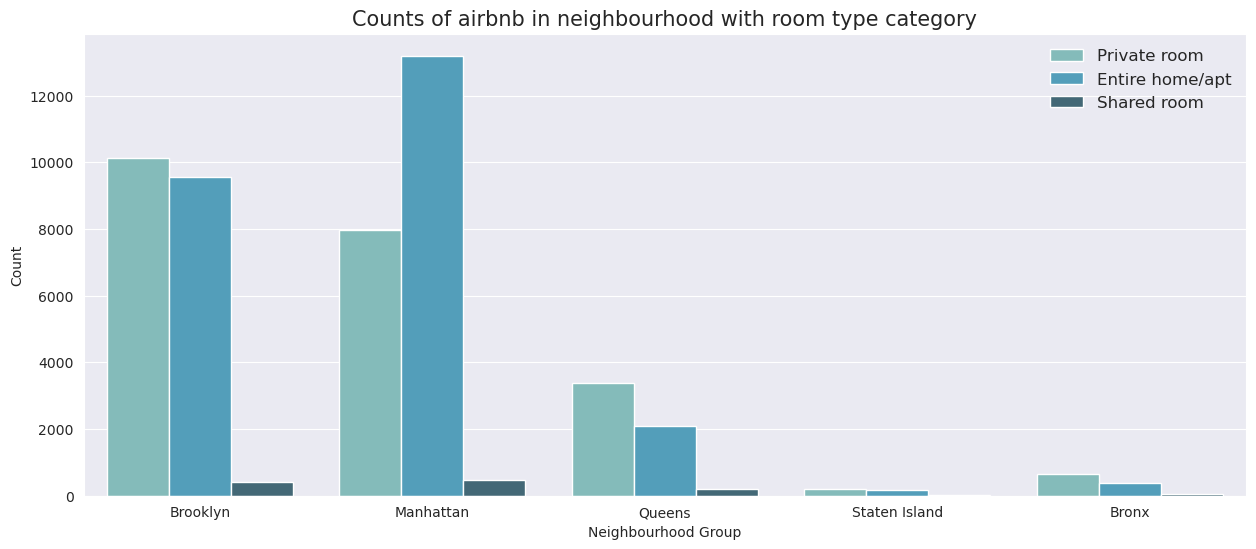

In [33]:
# Visualisation 1

plt.figure(figsize=(15,6))
sns.countplot(data=data, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhood with room type category', fontsize=15)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.legend(frameon=False, fontsize=12)

Text(0, 0.5, 'Price')

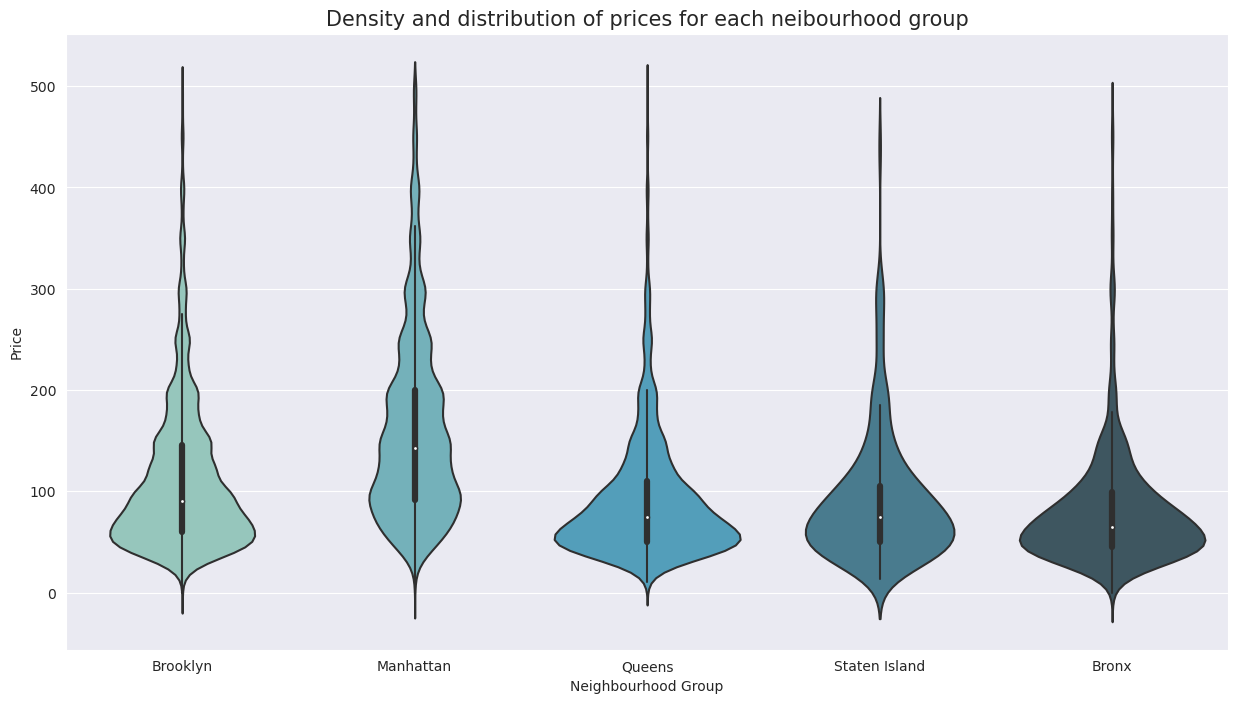

In [34]:
# Visualization 2 - Distribution of prices

plt.figure(figsize=(15,8))
sns.violinplot(data=data[data.price < 500], x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neibourhood group', fontsize=15)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

<Figure size 1500x800 with 0 Axes>

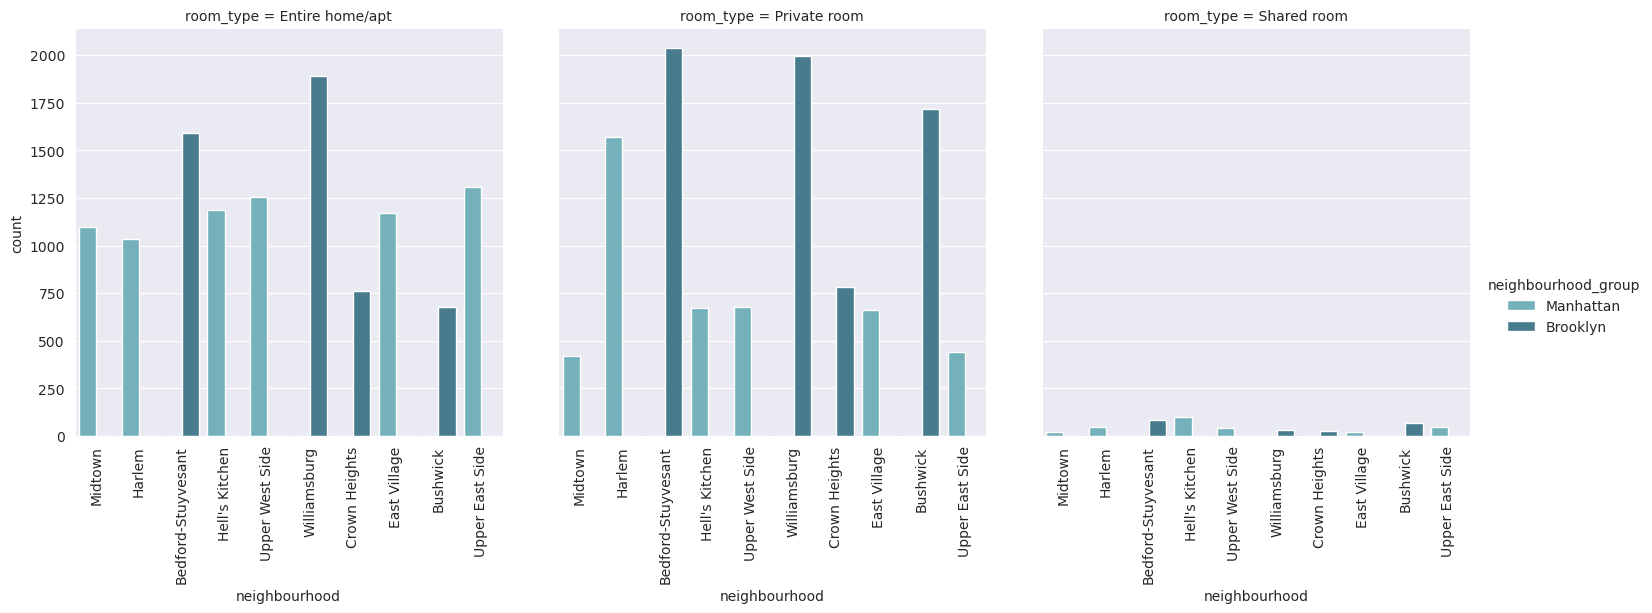

In [35]:
# Visualisation 3 - top neighbourhoods with a category of room type
top_nei = data['neighbourhood'].value_counts().head(10).index.tolist()

plt.figure(figsize=(15, 8))
vis_3 = sns.catplot(
    x='neighbourhood',
    hue='neighbourhood_group',
    col='room_type',
    data=data[data['neighbourhood'].isin(top_nei)],
    kind='count',
    palette='GnBu_d'
)
vis_3.set_xticklabels(rotation=90)


Text(0, 0.5, 'Count')

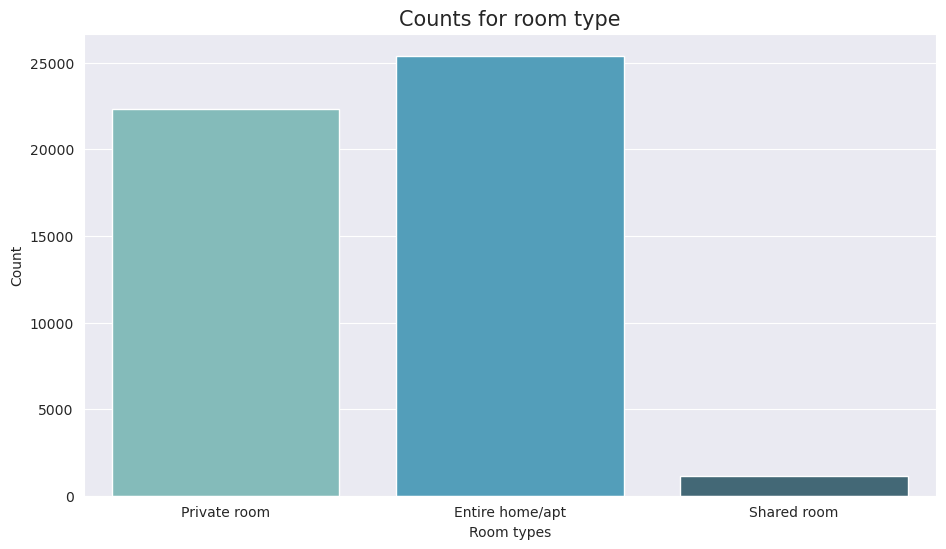

In [36]:
# Visualisation 4 - room types

plt.figure(figsize=(11,6))
sns.countplot(data=data,x='room_type', palette='GnBu_d')
plt.title('Counts for room type', fontsize=15)
plt.xlabel('Room types')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

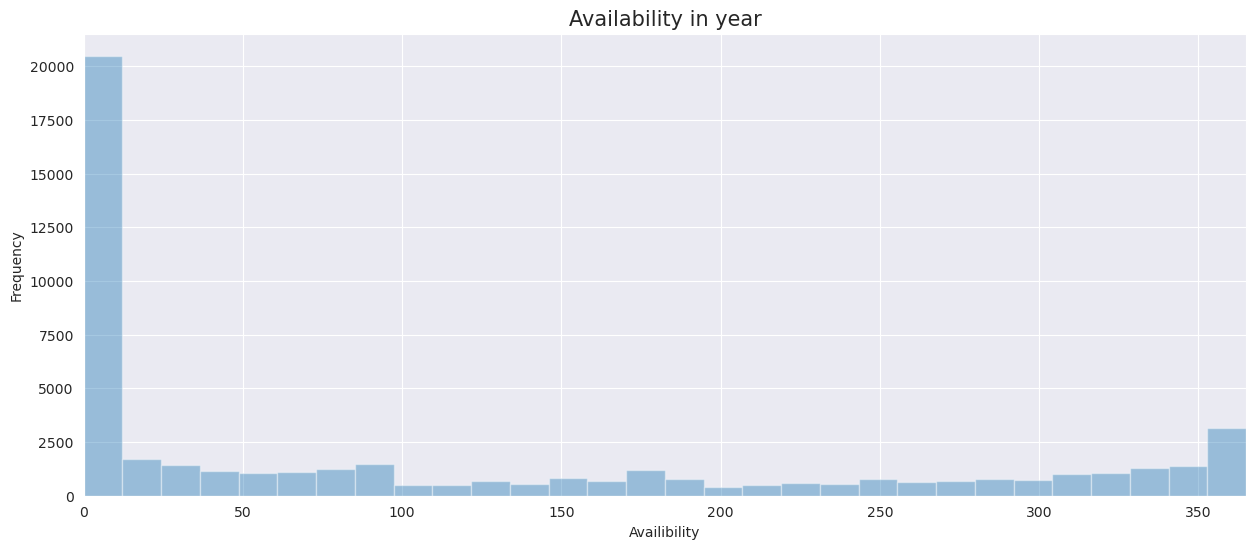

In [37]:
# Visualisation 5 - availability in year

plt.figure(figsize=(15,6))
sns.distplot(data.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")

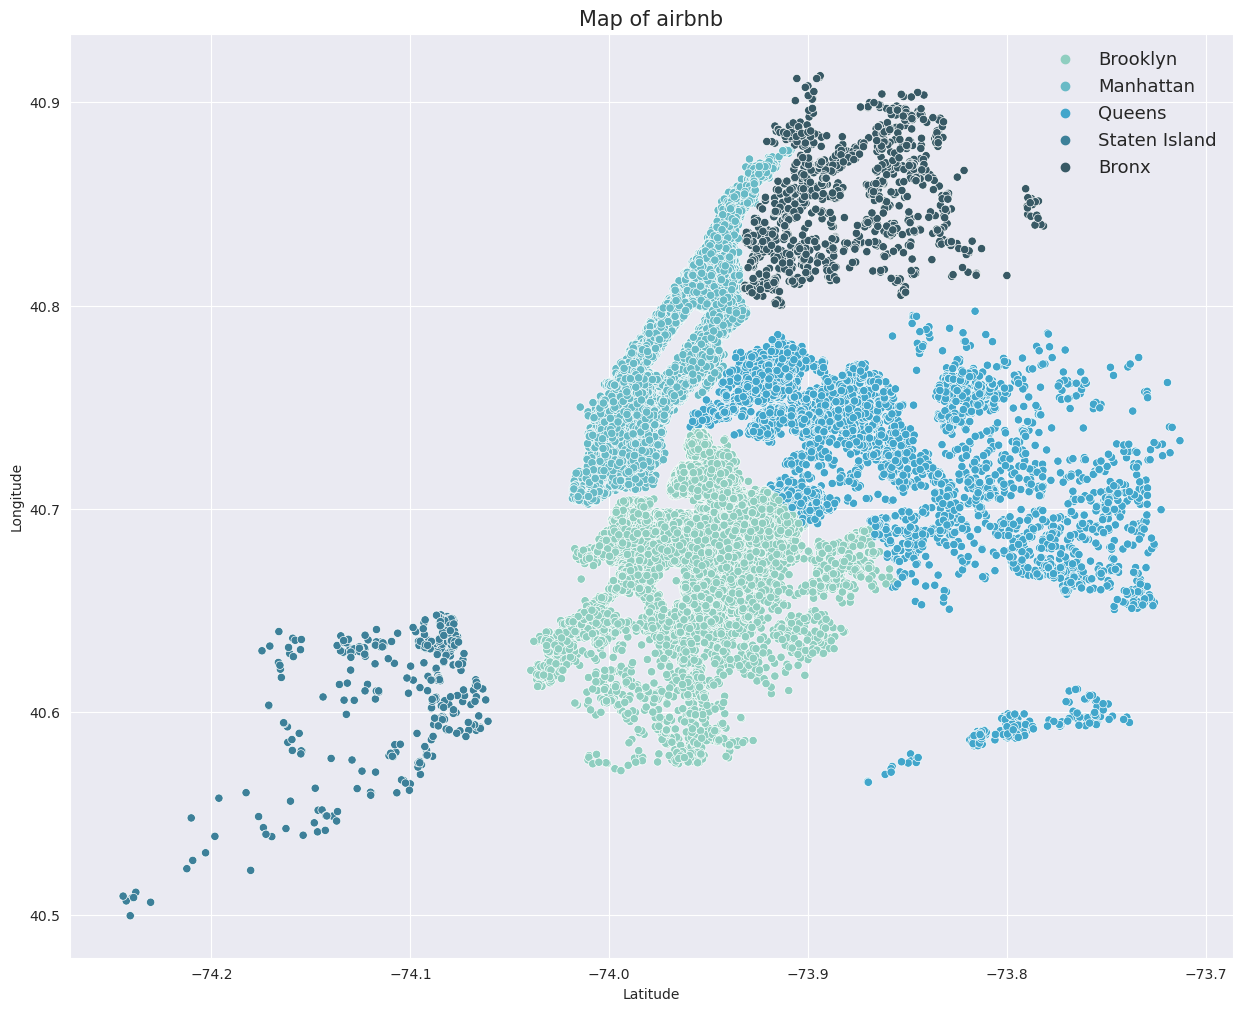

In [39]:
# Visualisation 6 - map of hosts

plt.figure(figsize=(15,12))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(frameon=False, fontsize=13)

<Axes: >

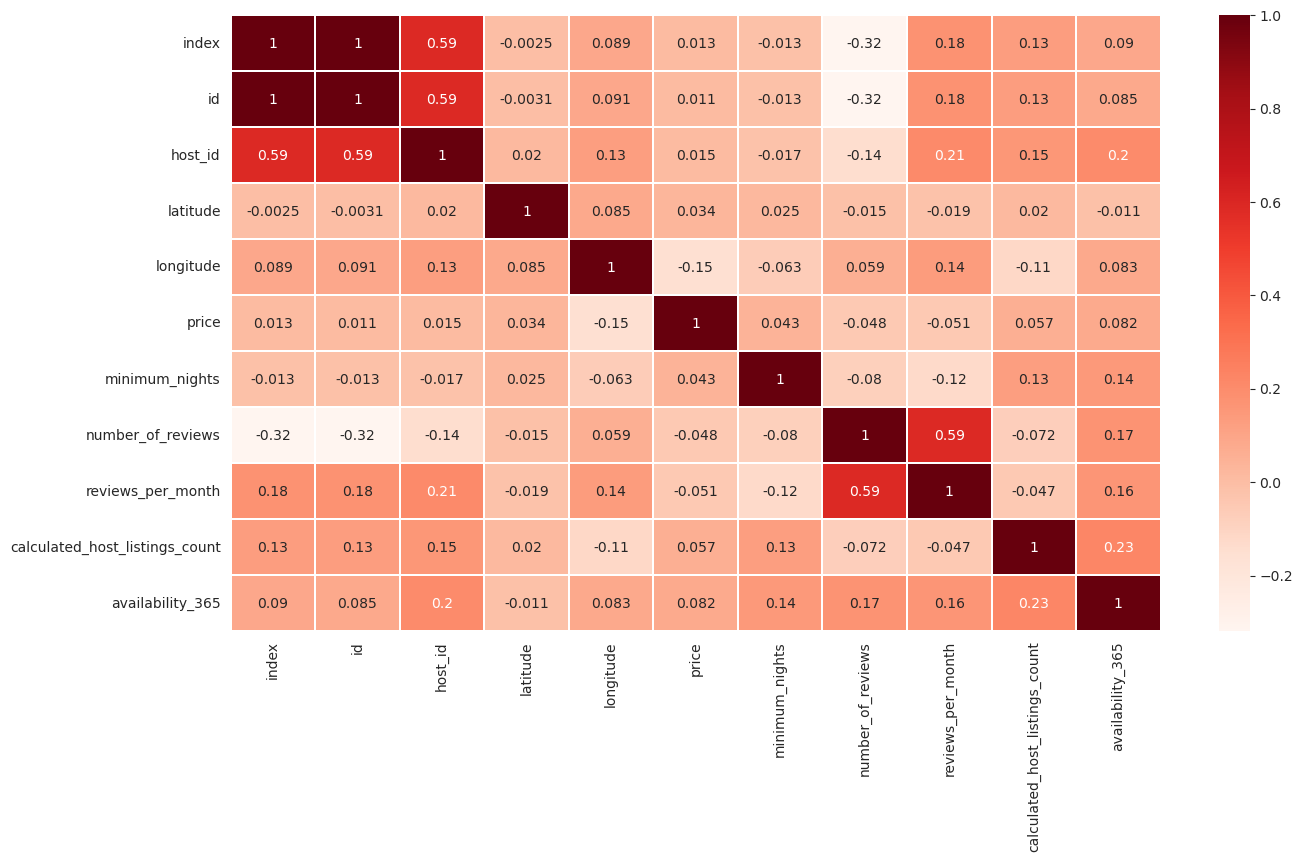

In [41]:
# Visualization 7 - correlation between values
plt.figure(figsize=(15, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.1, cmap='Reds')


In [42]:
# Visualisation 8 - prices in neighbourhoods 

data1 = pd.DataFrame(data.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean())
data1.reset_index(inplace=True)

bronx = (data1[data1['neighbourhood_group'] =='Bronx']).sort_values(by='price',ascending=False).head(10)
brooklyn = (data1[data1['neighbourhood_group'] =='Brooklyn']).sort_values(by='price',ascending=False).head(10)
manhattan = (data1[data1['neighbourhood_group'] =='Manhattan']).sort_values(by='price',ascending=False).head(10)
queens = (data1[data1['neighbourhood_group'] =='Queens']).sort_values(by='price',ascending=False).head(10)
staten = (data1[data1['neighbourhood_group'] =='Staten Island']).sort_values(by='price',ascending=False).head(10)

neighs = [bronx, brooklyn, manhattan, queens, staten]
titles = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

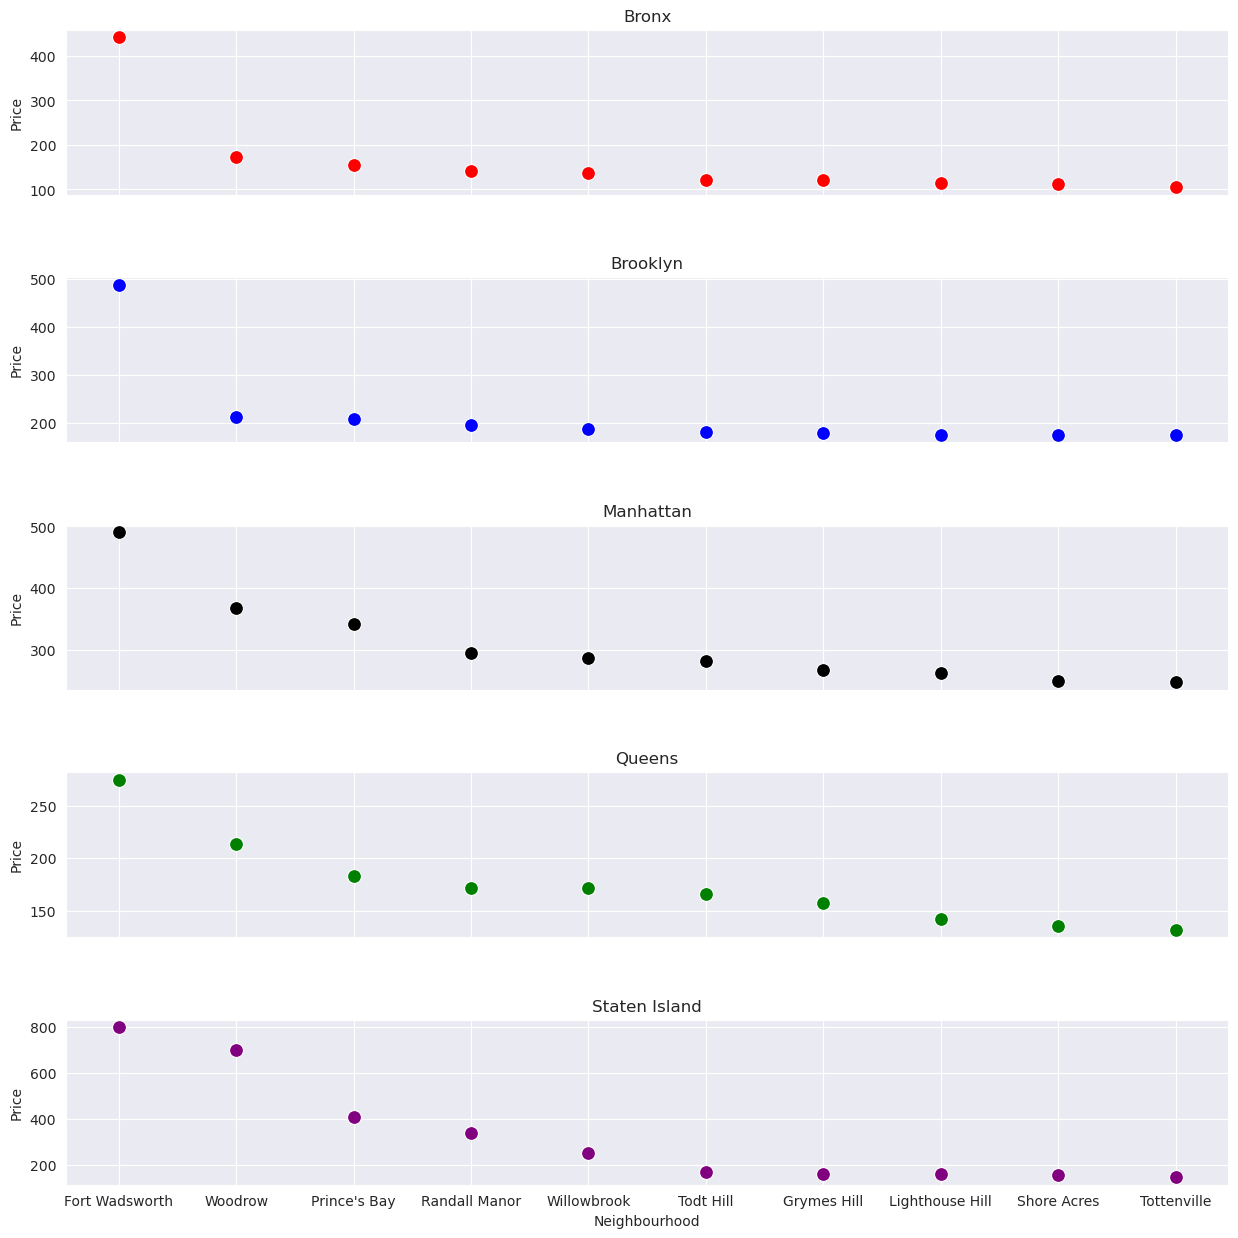

In [43]:
fig, axs = plt.subplots(5, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0})
sns.scatterplot(data=bronx, x='neighbourhood', y='price', ax=axs[0], color='red', s=100)
sns.scatterplot(data=brooklyn, x='neighbourhood', y='price', ax=axs[1], color='blue', s=100)
sns.scatterplot(data=manhattan, x='neighbourhood', y='price', ax=axs[2], color='black', s=100)
sns.scatterplot(data=queens, x='neighbourhood', y='price', ax=axs[3], color='green', s=100)
sns.scatterplot(data=staten, x='neighbourhood', y='price', ax=axs[4], color='purple', s=100)

axs[0].set_title('Bronx')
axs[1].set_title('Brooklyn')
axs[2].set_title('Manhattan')
axs[3].set_title('Queens')
axs[4].set_title('Staten Island')

for ax in axs:
    ax.set(xlabel='Neighbourhood', ylabel='Price')
    ax.label_outer()

In [44]:
# Preparing dataset for predictions

data_pred = pd.read_csv('AB_NYC_2019.csv')

In [45]:
data_pred.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [46]:
data_pred.drop(['name','host_name','last_review','id'], inplace=True, axis=1)

In [47]:
data_pred['reviews_per_month'] = data_pred['reviews_per_month'].fillna(value=0, inplace = False)

In [48]:
data_pred.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [49]:
le = preprocessing.LabelEncoder()

le.fit(data_pred['neighbourhood_group'])
data_pred['neighbourhood_group']=le.transform(data_pred['neighbourhood_group'])

le.fit(data_pred['neighbourhood'])
data_pred['neighbourhood']=le.transform(data_pred['neighbourhood'])

le.fit(data_pred['room_type'])
data_pred['room_type']=le.transform(data_pred['room_type'])

In [50]:
data_pred.sort_values('price', ascending = True, inplace= True)


In [51]:
data_pred = data_pred[11:-6]

In [52]:
lm = LinearRegression()

In [53]:
x = data_pred.drop(['price','longitude'], inplace=False, axis=1)
y = data_pred['price']

x_train,x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=101)

lm.fit(x_train, y_train)

LinearRegression()

In [54]:
predictions = lm.predict(x_test)

In [55]:
# Evaluated metrics

mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 76.12984118966267
MSE (Mean Squared Error): 42229.03230108089
RMSE (Root mean squared error): 205.49703720754928
R2 score: 0.09138535240632695


In [56]:
# Avtual vs predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(10)

,Actual Values,Predicted Values
0,85,127.025785
1,90,189.666365
2,50,72.411203
3,65,96.489395
4,450,157.853679
5,74,62.167818
6,80,116.745626
7,125,82.619808
8,72,111.386136
9,35,83.899589


Text(0, 0.5, 'Test')

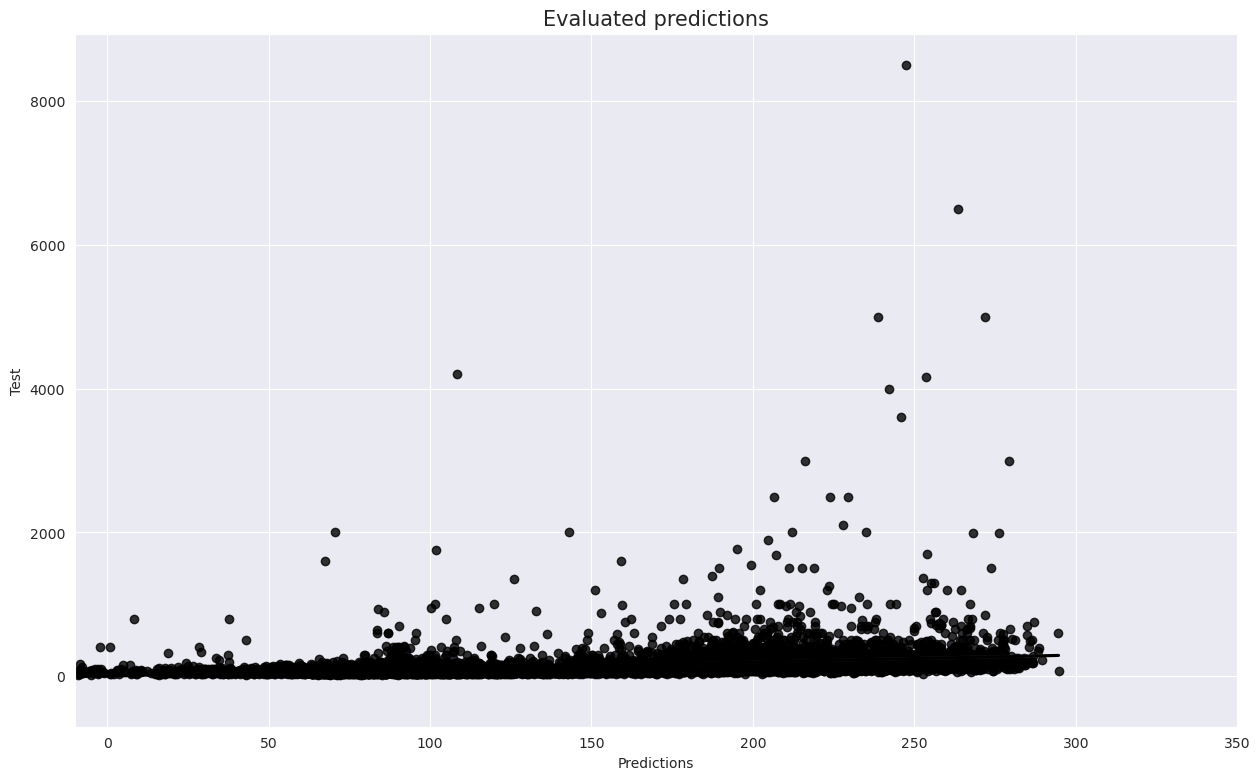

In [59]:
# Evaluated predictions

plt.figure(figsize=(15,9))
plt.xlim(-10,350)
sns.regplot(y=y_test, x=predictions, color='black')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')